In [1]:
##### comoany sales report ### assignment ####

In [3]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [4]:
company = pd.read_csv("Company_Data.csv")

In [5]:
company.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,9.50
1,111,48,16,260,83,Good,65,10,Yes,Yes,11.22
2,113,35,10,269,80,Medium,59,12,Yes,Yes,10.06
3,117,100,4,466,97,Medium,55,14,Yes,Yes,7.40
4,141,64,3,340,128,Bad,38,13,Yes,No,4.15


In [6]:
company.shape

(400, 11)

In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CompPrice    400 non-null    int64  
 1   Income       400 non-null    int64  
 2   Advertising  400 non-null    int64  
 3   Population   400 non-null    int64  
 4   Price        400 non-null    int64  
 5   ShelveLoc    400 non-null    object 
 6   Age          400 non-null    int64  
 7   Education    400 non-null    int64  
 8   Urban        400 non-null    object 
 9   US           400 non-null    object 
 10  Sales        400 non-null    float64
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
company.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education,Sales
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000,7.496325
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528,2.824115
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000,0.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000,5.390000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000,7.490000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000,9.320000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000,16.270000


In [9]:
company["Sales"]=pd.cut(company.Sales,bins=(0,7.5,18),labels=['lowsales','highsales'])

In [10]:
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,highsales
1,111,48,16,260,83,Good,65,10,Yes,Yes,highsales
2,113,35,10,269,80,Medium,59,12,Yes,Yes,highsales
3,117,100,4,466,97,Medium,55,14,Yes,Yes,lowsales
4,141,64,3,340,128,Bad,38,13,Yes,No,lowsales
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,highsales
396,139,23,3,37,120,Medium,55,11,No,Yes,lowsales
397,162,26,12,368,159,Medium,40,18,Yes,Yes,lowsales
398,100,79,7,284,95,Bad,50,12,Yes,Yes,lowsales


In [11]:
x = company.iloc[:,:-1]

In [12]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [13]:
y=company.iloc[:,10]

In [14]:
y.head()

0    highsales
1    highsales
2    highsales
3     lowsales
4     lowsales
Name: Sales, dtype: category
Categories (2, object): [lowsales < highsales]

In [15]:
label_encode_x = LabelEncoder()

In [16]:
x = x.apply(LabelEncoder().fit_transform)

In [17]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49,51,11,141,54,0,17,7,1,1
1,22,27,16,129,18,1,40,0,1,1
2,24,14,10,138,15,2,34,2,1,1
3,28,77,4,249,31,2,30,4,1,1
4,52,42,3,178,62,0,13,3,1,0


In [18]:
x.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [19]:
y.isnull().sum()

1

In [20]:
y=y.drop(y.index[[174]],axis=0).reset_index()
y

,index,Sales
0,0,highsales
1,1,highsales
2,2,highsales
3,3,lowsales
4,4,lowsales
...,...,...
394,395,highsales
395,396,lowsales
396,397,lowsales
397,398,lowsales


In [21]:
#Drop the original index
y=y.drop(['index'],axis=1)

In [22]:
y.iloc[174,:]

Sales    highsales
Name: 174, dtype: category
Categories (2, object): [lowsales < highsales]

In [23]:
y

,Sales
0,highsales
1,highsales
2,highsales
3,lowsales
4,lowsales
...,...
394,highsales
395,lowsales
396,lowsales
397,lowsales


In [24]:
x=x.drop(x.index[[174]],axis=0).reset_index()
x

,index,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,49,51,11,141,54,0,17,7,1,1
1,1,22,27,16,129,18,1,40,0,1,1
2,2,24,14,10,138,15,2,34,2,1,1
3,3,28,77,4,249,31,2,30,4,1,1
4,4,52,42,3,178,62,0,13,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
394,395,49,85,17,104,62,1,8,4,1,1
395,396,50,2,3,17,54,2,30,1,0,1
396,397,71,5,12,195,91,2,15,8,1,1
397,398,12,57,7,145,29,0,25,2,1,1


In [25]:
x=x.drop(['index'],axis=1)

In [26]:
x.iloc[174,:]

CompPrice      26
Income         66
Advertising     0
Population     18
Price          56
ShelveLoc       2
Age             0
Education       2
Urban           1
US              0
Name: 174, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

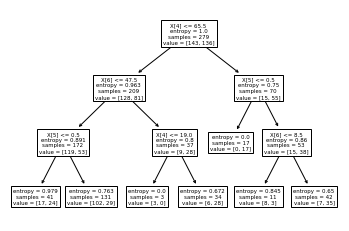

In [29]:
#PLot the decision tree
tree.plot_tree(model);


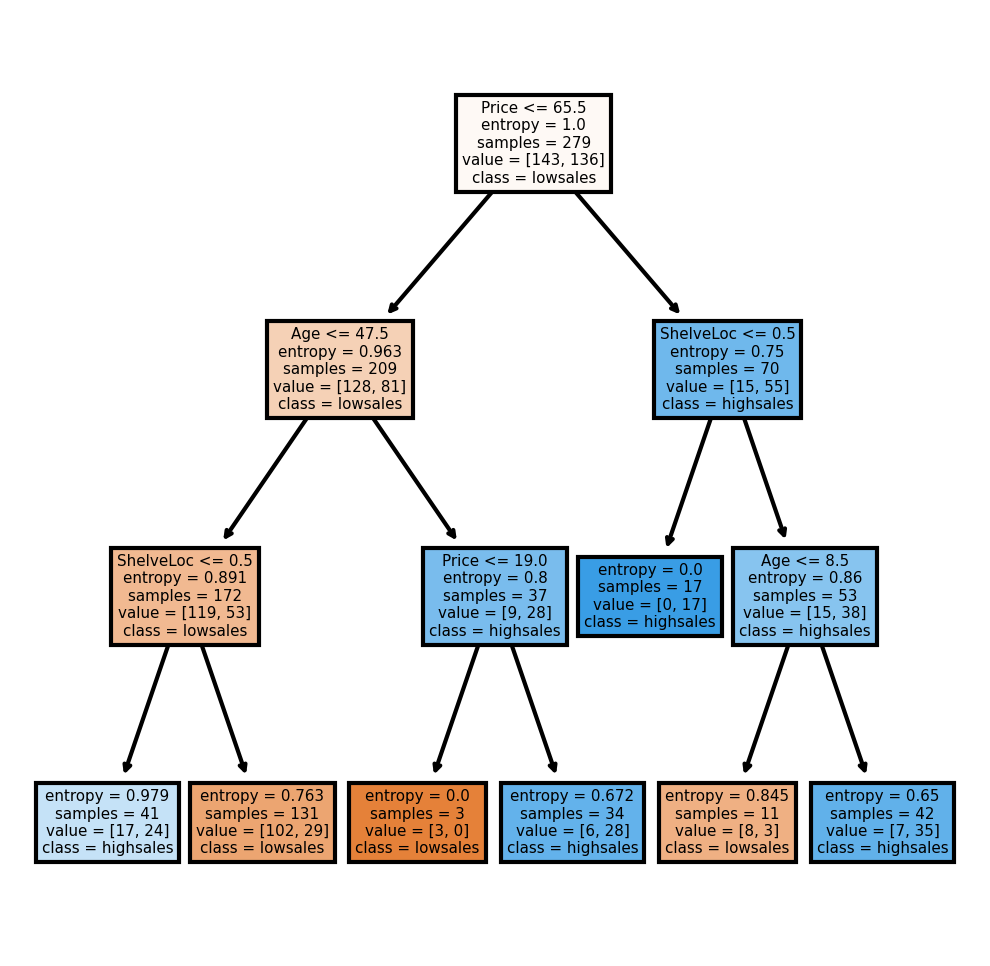

In [30]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['lowsales','highsales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [31]:
model.feature_importances_ 

array([0.        , 0.        , 0.        , 0.        , 0.40124752,
       0.25358598, 0.3451665 , 0.        , 0.        , 0.        ])

In [32]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Price          0.401248
Age            0.345166
ShelveLoc      0.253586
US             0.000000
Urban          0.000000
Education      0.000000
Population     0.000000
Advertising    0.000000
Income         0.000000
CompPrice      0.000000
dtype: float64

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


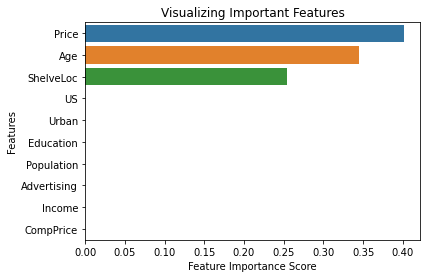

In [34]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [35]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

highsales    70
lowsales     50
dtype: int64

In [36]:
preds

array(['lowsales', 'highsales', 'highsales', 'lowsales', 'highsales',
       'highsales', 'highsales', 'highsales', 'highsales', 'highsales',
       'highsales', 'highsales', 'highsales', 'highsales', 'lowsales',
       'highsales', 'highsales', 'lowsales', 'highsales', 'highsales',
       'highsales', 'highsales', 'lowsales', 'highsales', 'highsales',
       'highsales', 'lowsales', 'lowsales', 'lowsales', 'highsales',
       'lowsales', 'lowsales', 'highsales', 'highsales', 'highsales',
       'highsales', 'highsales', 'lowsales', 'highsales', 'lowsales',
       'highsales', 'lowsales', 'lowsales', 'lowsales', 'highsales',
       'lowsales', 'lowsales', 'highsales', 'lowsales', 'highsales',
       'lowsales', 'highsales', 'lowsales', 'highsales', 'lowsales',
       'highsales', 'lowsales', 'lowsales', 'highsales', 'lowsales',
       'highsales', 'lowsales', 'lowsales', 'highsales', 'lowsales',
       'highsales', 'highsales', 'lowsales', 'lowsales', 'highsales',
       'lowsales', 'l

In [80]:
y_test

,Sales
142,lowsales
135,lowsales
77,highsales
246,lowsales
118,highsales
...,...
177,highsales
254,highsales
90,lowsales
318,lowsales


In [81]:
preds

,0
0,lowsales
1,highsales
2,highsales
3,lowsales
4,highsales
...,...
115,highsales
116,highsales
117,highsales
118,highsales


In [82]:
df1=pd.DataFrame(y_test)

In [83]:
df1

,Sales
142,lowsales
135,lowsales
77,highsales
246,lowsales
118,highsales
...,...
177,highsales
254,highsales
90,lowsales
318,lowsales


In [113]:
df2=pd.DataFrame(preds)

In [127]:
df2.column

['column name']

In [128]:
df2

,0
0,lowsales
1,highsales
2,highsales
3,lowsales
4,highsales
...,...
115,highsales
116,highsales
117,highsales
118,highsales


In [129]:
pd.crosstab(df1.Sales,df2.column)

col_0,column name
Sales,
lowsales,65
highsales,55


In [149]:
# Accuracy 
np.mean(df2.column==df1.Sales)

ValueError: Lengths must match to compare

In [146]:
df1.shape

(120, 1)

In [147]:
df2.shape

(120, 1)